In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

## Analisis Prediktif: Total Expenditure Dataset

Projek ini melakukan analisis dan pemodelan untuk memprediksi `TOTAL_EXPENDITURE` berdasarkan fitur finansial dan pendaftaran siswa.

### Langkah-langkah:
1. Import library yang diperlukan
2. Load dataset dari Google Drive
3. Eksplorasi dan pemahaman data
4. Pembersihan data (handling missing values)
5. Seleksi fitur dan target
6. Imputation dan preprocessing
7. Train-test split
8. Model training (Linear Regression & Random Forest)
9. Evaluasi dan visualisasi hasil

Import Database


### Fase 1: Eksplorasi Data

Memahami struktur dataset dengan melihat sample data, tipe data, distribusi, dan missing values.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/psd/states_all_extended.csv')

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 266 entries, PRIMARY_KEY to G08_TR_A_MATHEMATICS
dtypes: float64(263), int64(1), object(2)
memory usage: 3.5+ MB


In [6]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,246.000000,248.000000,153.000000,157.000000,61.000000,60.000000,14.000000,13.000000,141.000000,145.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,254.845528,269.995968,279.803922,306.898089,246.688525,261.016667,248.285714,264.846154,268.085106,284.082759
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,5.617077,5.992909,9.017570,11.034436,7.630074,6.652365,6.568322,7.861787,7.218517,7.684313
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,239.000000,255.000000,257.000000,277.000000,229.000000,240.000000,234.000000,250.000000,249.000000,266.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,251.000000,266.000000,274.000000,301.000000,242.000000,257.750000,244.250000,258.000000,263.000000,279.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,255.000000,270.000000,281.000000,309.000000,247.000000,261.000000,248.500000,266.000000,267.000000,284.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,258.000000,274.000000,286.000000,314.000000,252.000000,265.000000,253.500000,269.000000,272.000000,289.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,277.000000,287.000000,298.000000,332.000000,261.000000,275.000000,259.000000,276.000000,291.000000,305.000000


In [7]:
df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1715,1715
unique,1715,53
top,2019_WYOMING,ALABAMA
freq,1,33


In [8]:
df.nunique()

,0
PRIMARY_KEY,1715
STATE,53
YEAR,33
ENROLL,1224
TOTAL_REVENUE,1274
...,...
G08_AM_A_MATHEMATICS,23
G08_HP_A_READING,13
G08_HP_A_MATHEMATICS,11
G08_TR_A_READING,33


In [9]:
df.isna()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,True,True,True,True,False,False
1711,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,True,False,False
1712,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
1713,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,True,False,False


In [10]:
print(df.isna().sum())


PRIMARY_KEY                0
STATE                      0
YEAR                       0
ENROLL                   491
TOTAL_REVENUE            440
                        ... 
G08_AM_A_MATHEMATICS    1655
G08_HP_A_READING        1701
G08_HP_A_MATHEMATICS    1702
G08_TR_A_READING        1574
G08_TR_A_MATHEMATICS    1570
Length: 266, dtype: int64


### Fase 2: Pembersihan Data (Data Cleaning)

**Strategi:**
1. Hapus kolom dengan >60% missing values (threshold = 0.6)
2. Hapus baris yang memiliki <50% nilai non-null (threshold = 50% dari total kolom)
3. Validasi struktur data setelah cleaning

In [11]:
missing_thresh = 0.6
null_frac = df.isnull().mean()
cols_to_keep = null_frac[null_frac < missing_thresh].index
df = df[cols_to_keep]

In [12]:
row_thresh = int(len(df.columns) * 0.5)
df = df.dropna(thresh=row_thresh)

In [13]:
print(df.shape)
df.info()

(1632, 30)
<class 'pandas.core.frame.DataFrame'>
Index: 1632 entries, 0 to 1631
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1632 non-null   object 
 1   STATE                         1632 non-null   object 
 2   YEAR                          1632 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 1

### Fase 3: Seleksi Fitur dan Target

**Target (y):** `TOTAL_EXPENDITURE` - total pengeluaran pendidikan

**Fitur (X) yang digunakan:**
- `ENROLL` - jumlah pendaftar siswa
- `FEDERAL_REVENUE` - pendapatan federal
- `STATE_REVENUE` - pendapatan negara bagian
- `LOCAL_REVENUE` - pendapatan lokal
- `SUPPORT_SERVICES_EXPENDITURE` - pengeluaran layanan pendukung
- `OTHER_EXPENDITURE` - pengeluaran lainnya

In [14]:
y = df['TOTAL_EXPENDITURE']
X = df[['ENROLL',
        'FEDERAL_REVENUE',
        'STATE_REVENUE',
        'LOCAL_REVENUE',
        'SUPPORT_SERVICES_EXPENDITURE',
        'OTHER_EXPENDITURE']]

In [15]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.fillna(y.mean())

### Fase 4: Imputation & Preprocessing

**Handling missing values:**
- Fitur (X): Gunakan `SimpleImputer` dengan strategi 'mean'
- Target (y): Isi dengan nilai rata-rata (`fillna`)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fase 5: Train-Test Split

Membagi data menjadi:
- **Training set (80%):** Digunakan untuk melatih model
- **Test set (20%):** Digunakan untuk evaluasi model
- **Random state:** 42 (untuk reproducibility)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

### Fase 6: Model Training & Prediksi

#### Model 1: Linear Regression
Model regresi linear sederhana untuk memahami hubungan linear antar fitur.

In [19]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

#### Model 2: Random Forest
Ensemble model yang menggunakan multiple decision trees untuk menangkap hubungan non-linear yang lebih kompleks.

In [20]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [21]:
print(f"Linear Regression -> RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}, MAE: {mae_lr:.2f}")
print(f"Random Forest     -> RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}, MAE: {mae_rf:.2f}")

Linear Regression -> RMSE: 513325.30, R²: 1.00, MAE: 223281.03
Random Forest     -> RMSE: 564650.65, R²: 1.00, MAE: 259672.82


### Fase 7: Evaluasi Model

**Metrik yang digunakan:**
- **RMSE (Root Mean Squared Error):** Mengukur rata-rata error, memberikan penalti lebih besar pada error besar
- **R² Score:** Menunjukkan proporsi varians yang dijelaskan model (0-1, semakin tinggi semakin baik)
- **MAE (Mean Absolute Error):** Rata-rata error absolut dalam satuan original
- **MAPE (Mean Absolute Percentage Error):** Error dalam bentuk persentase

In [22]:
# Validasi bahwa fitur diambil dari data yang benar
print(f"Data shape: {df.shape}")
print(f"Features shape: {X.shape}")
print(f"Test set size: {len(y_test)}")

Data shape: (1632, 30)
Features shape: (1632, 6)
Test set size: 327


In [23]:
pd.DataFrame({
    'y_test': y_test[:10].values,
    'y_pred_lr': y_pred_lr[:10],
    'y_pred_rf': y_pred_rf[:10]
})

,y_test,y_pred_lr,y_pred_rf
0,1.765805e+06,2.193668e+06,1.927466e+06
1,9.206242e+06,9.204611e+06,9.206242e+06
2,9.882399e+06,9.831542e+06,9.851357e+06
3,8.026334e+06,7.965479e+06,8.236416e+06
4,9.323053e+06,9.702034e+06,9.420891e+06
5,1.740021e+07,1.790769e+07,1.738001e+07
6,1.145684e+06,1.111425e+06,1.268450e+06
7,9.206242e+06,9.204611e+06,9.206242e+06
8,1.915839e+07,1.966905e+07,1.870508e+07
9,2.949608e+06,3.002394e+06,3.133311e+06


In [24]:
# Calculate percentage error and show statistics
percentage_error_lr = pd.Series(np.abs((y_test.values - y_pred_lr) / y_test.values) * 100)
print("Percentage Error Statistics (Linear Regression):")
print(percentage_error_lr.describe())

Percentage Error Statistics (Linear Regression):
count    327.000000
mean       2.671164
std        3.175202
min        0.014895
25%        0.351320
50%        1.871670
75%        3.661508
max       24.230467
dtype: float64


In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Linear Regression MAPE: {mape_lr:.2%}")
print(f"Random Forest     MAPE: {mape_rf:.2%}")

Linear Regression MAPE: 2.67%
Random Forest     MAPE: 3.11%


### Fase 9: Analisis Lanjutan

**Tujuan:** Menggali insight lebih dalam tentang hubungan fitur dengan target dan performa model

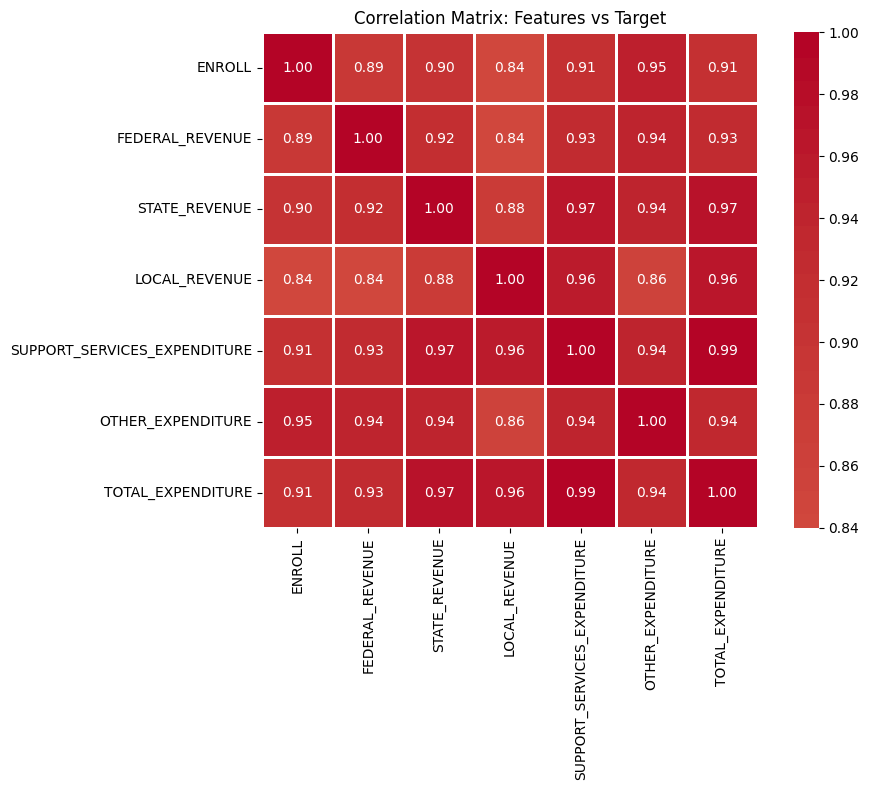


Top 5 Features paling berkorelasi dengan TOTAL_EXPENDITURE:
SUPPORT_SERVICES_EXPENDITURE    0.993083
STATE_REVENUE                   0.970117
LOCAL_REVENUE                   0.963487
OTHER_EXPENDITURE               0.936386
FEDERAL_REVENUE                 0.925245
ENROLL                          0.908436
Name: TOTAL_EXPENDITURE, dtype: float64


In [26]:
#### 1. Feature Correlation Matrix
# Analisis korelasi antar fitur dan target
feature_names = ['ENROLL', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
                 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE']
correlation_data = pd.DataFrame(X_train, columns=feature_names)
correlation_data['TOTAL_EXPENDITURE'] = y_train.values

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=1)
plt.title('Correlation Matrix: Features vs Target')
plt.tight_layout()
plt.show()

print("\nTop 5 Features paling berkorelasi dengan TOTAL_EXPENDITURE:")
correlation_with_target = correlation_matrix['TOTAL_EXPENDITURE'].drop('TOTAL_EXPENDITURE').sort_values(ascending=False)
print(correlation_with_target)

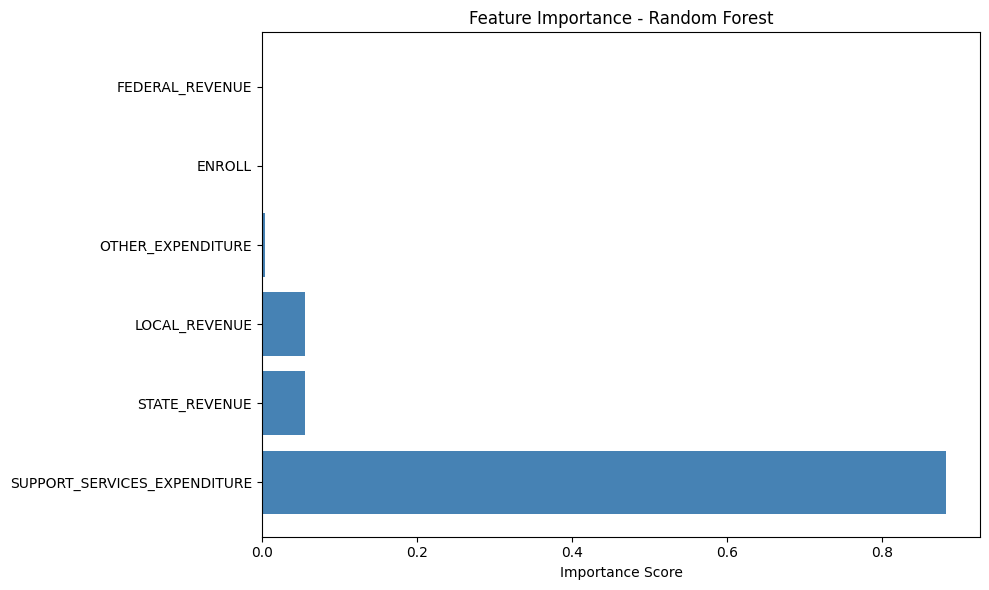


Feature Importance Ranking:
                        Feature  Importance
4  SUPPORT_SERVICES_EXPENDITURE    0.882652
2                 STATE_REVENUE    0.055857
3                 LOCAL_REVENUE    0.055372
5             OTHER_EXPENDITURE    0.003427
0                        ENROLL    0.001578
1               FEDERAL_REVENUE    0.001115


In [27]:
#### 2. Feature Importance dari Random Forest
# Random Forest menunjukkan fitur mana yang paling penting dalam prediksi
feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(feature_importance_df)

TRAIN vs TEST PERFORMANCE (Overfitting Detection)

Linear Regression:
  Train R² Score: 0.9983
  Test R² Score:  0.9979
  Difference:     0.0004 (gap)

Random Forest:
  Train R² Score: 0.9993
  Test R² Score:  0.9974
  Difference:     0.0019 (gap)


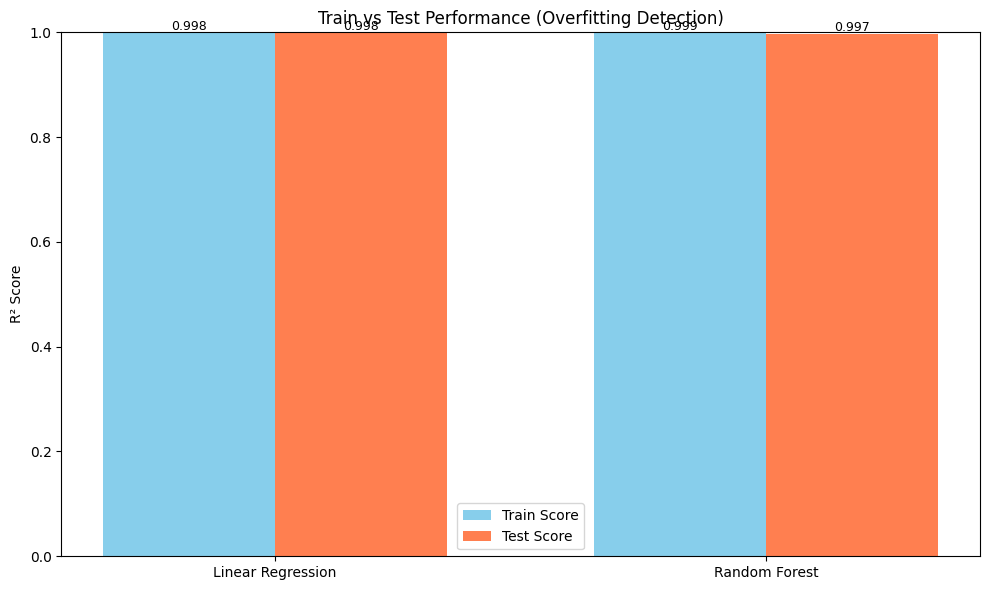

In [28]:
#### 3. Train vs Test Performance (Deteksi Overfitting)
# Hitung akurasi pada training set untuk mendeteksi overfitting
y_train_pred_lr = lr.predict(X_train)
y_train_pred_rf = rf.predict(X_train)

train_score_lr = r2_score(y_train, y_train_pred_lr)
test_score_lr = r2_score(y_test, y_pred_lr)

train_score_rf = r2_score(y_train, y_train_pred_rf)
test_score_rf = r2_score(y_test, y_pred_rf)

print("=" * 60)
print("TRAIN vs TEST PERFORMANCE (Overfitting Detection)")
print("=" * 60)
print(f"\nLinear Regression:")
print(f"  Train R² Score: {train_score_lr:.4f}")
print(f"  Test R² Score:  {test_score_lr:.4f}")
print(f"  Difference:     {train_score_lr - test_score_lr:.4f} (gap)")

print(f"\nRandom Forest:")
print(f"  Train R² Score: {train_score_rf:.4f}")
print(f"  Test R² Score:  {test_score_rf:.4f}")
print(f"  Difference:     {train_score_rf - test_score_rf:.4f} (gap)")

# Visualisasi comparison
models = ['Linear Regression', 'Random Forest']
train_scores = [train_score_lr, train_score_rf]
test_scores = [test_score_lr, test_score_rf]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Train Score', color='skyblue')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test Score', color='coral')

ax.set_ylabel('R² Score')
ax.set_title('Train vs Test Performance (Overfitting Detection)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [29]:
#### 4. Model Comparison Table
# Buat tabel perbandingan lengkap semua metrik
comparison_data = {
    'Metric': ['RMSE', 'MAE', 'R² Score', 'MAPE (%)', 'Train R²', 'Test R²', 'Overfit Gap'],
    'Linear Regression': [
        f'{rmse_lr:.2f}',
        f'{mae_lr:.2f}',
        f'{r2_lr:.4f}',
        f'{mape_lr:.2f}',
        f'{train_score_lr:.4f}',
        f'{test_score_lr:.4f}',
        f'{train_score_lr - test_score_lr:.4f}'
    ],
    'Random Forest': [
        f'{rmse_rf:.2f}',
        f'{mae_rf:.2f}',
        f'{r2_rf:.4f}',
        f'{mape_rf:.2f}',
        f'{train_score_rf:.4f}',
        f'{test_score_rf:.4f}',
        f'{train_score_rf - test_score_rf:.4f}'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "=" * 80)
print("MODEL COMPARISON TABLE")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)


MODEL COMPARISON TABLE
     Metric Linear Regression Random Forest
       RMSE         513325.30     564650.65
        MAE         223281.03     259672.82
   R² Score            0.9979        0.9974
   MAPE (%)              0.03          0.03
   Train R²            0.9983        0.9993
    Test R²            0.9979        0.9974
Overfit Gap            0.0004        0.0019


### Fase 10: Kesimpulan dan Rekomendasi

In [34]:
print("""
╔════════════════════════════════════════════════════════════════════════════╗
║                          ANALYSIS SUMMARY                                 ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 KEY FINDINGS:
""")

# Tentukan model terbaik
best_model = "Random Forest" if r2_rf > r2_lr else "Linear Regression"
print(f"✓ Best Model: {best_model}")
print(f"  - R² Score: {max(r2_rf, r2_lr):.4f}")
print(f"  - RMSE: {min(rmse_rf, rmse_lr):.2f}")
print(f"  - MAE: {min(mae_rf, mae_lr):.2f}")

print(f"\n📈 Feature Correlations:")
print(f"✓ Strongest predictor: {correlation_with_target.idxmax()}")
print(f"  - Correlation: {correlation_with_target.max():.4f}")

print(f"\n⚠️  Overfitting Check:")
max_gap = max(train_score_lr - test_score_lr, train_score_rf - test_score_rf)
if max_gap > 0.1:
    print(f"✓ Potential overfitting detected (gap: {max_gap:.4f})")
    print(f"  Recommendation: Use regularization or reduce model complexity")
else:
    print(f"✓ Good generalization (gap: {max_gap:.4f})")

print(f"""
💡 RECOMMENDATIONS:
1. Model {best_model} performs better on this dataset
2. Focus on top features identified by Feature Importance analysis
3. Consider feature engineering to improve model performance
4. Use cross-validation for more robust evaluation
5. For production, ensure data preprocessing consistency

📚 NEXT STEPS:
- Test on different dataset splits
- Try hyperparameter tuning (GridSearchCV)
- Implement cross-validation (KFold/StratifiedKFold)
- Monitor prediction performance on new data
- Deploy best model with proper monitoring
""")


╔════════════════════════════════════════════════════════════════════════════╗
║                          ANALYSIS SUMMARY                                 ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 KEY FINDINGS:

✓ Best Model: Linear Regression
  - R² Score: 0.9979
  - RMSE: 513325.30
  - MAE: 223281.03

📈 Feature Correlations:
✓ Strongest predictor: SUPPORT_SERVICES_EXPENDITURE
  - Correlation: 0.9931

⚠️  Overfitting Check:
✓ Good generalization (gap: 0.0019)

💡 RECOMMENDATIONS:
1. Model Linear Regression performs better on this dataset
2. Focus on top features identified by Feature Importance analysis
3. Consider feature engineering to improve model performance
4. Use cross-validation for more robust evaluation
5. For production, ensure data preprocessing consistency

📚 NEXT STEPS:
- Test on different dataset splits
- Try hyperparameter tuning (GridSearchCV)
- Implement cross-validation (KFold/StratifiedKFold)
- Monitor prediction performanc

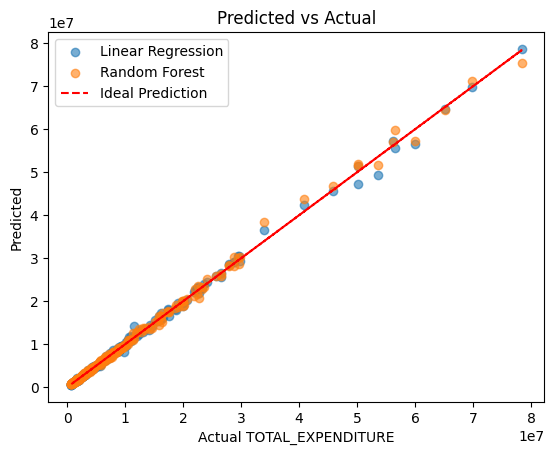

In [31]:
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Actual TOTAL_EXPENDITURE")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

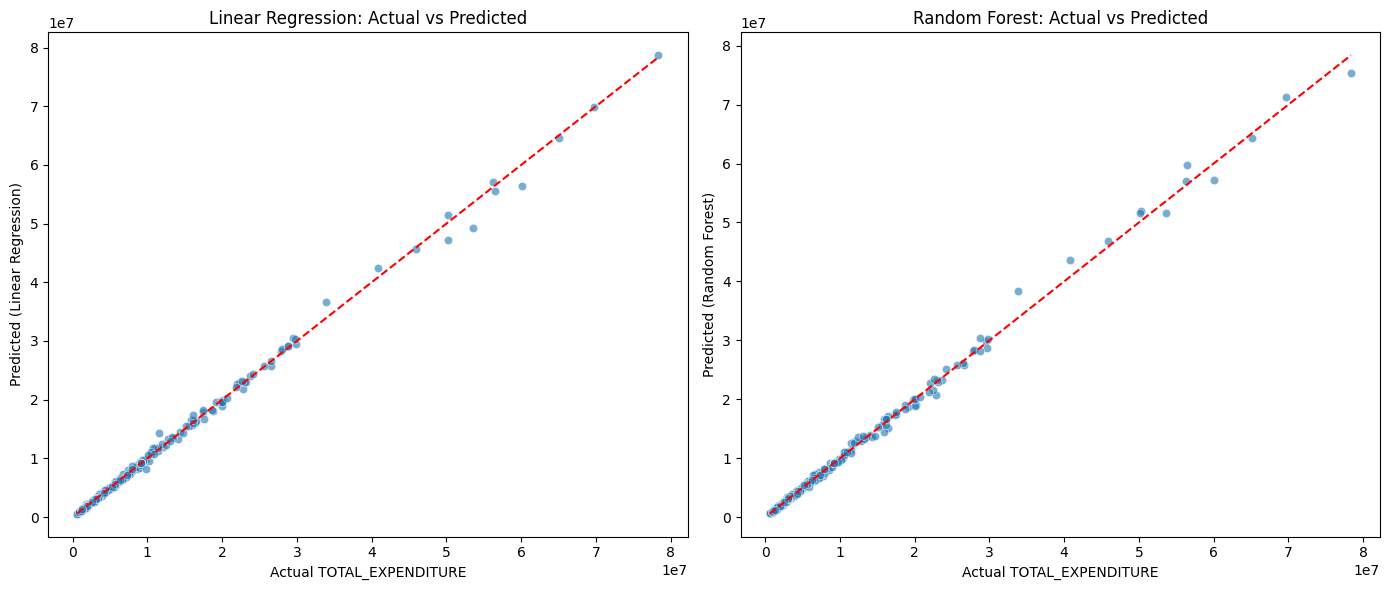

In [32]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual TOTAL_EXPENDITURE")
plt.ylabel("Predicted (Linear Regression)")
plt.title("Linear Regression: Actual vs Predicted")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual TOTAL_EXPENDITURE")
plt.ylabel("Predicted (Random Forest)")
plt.title("Random Forest: Actual vs Predicted")

plt.tight_layout()
plt.show()

### Fase 8: Visualisasi Hasil

**Visualisasi yang ditampilkan:**
1. **Scatter plot Actual vs Predicted:** Membandingkan kedua model dalam satu grafik
2. **Side-by-side subplots:** Linear Regression vs Random Forest dengan garis ideal (merah)
3. **Histogram Residuals:** Menunjukkan distribusi error untuk kedua model

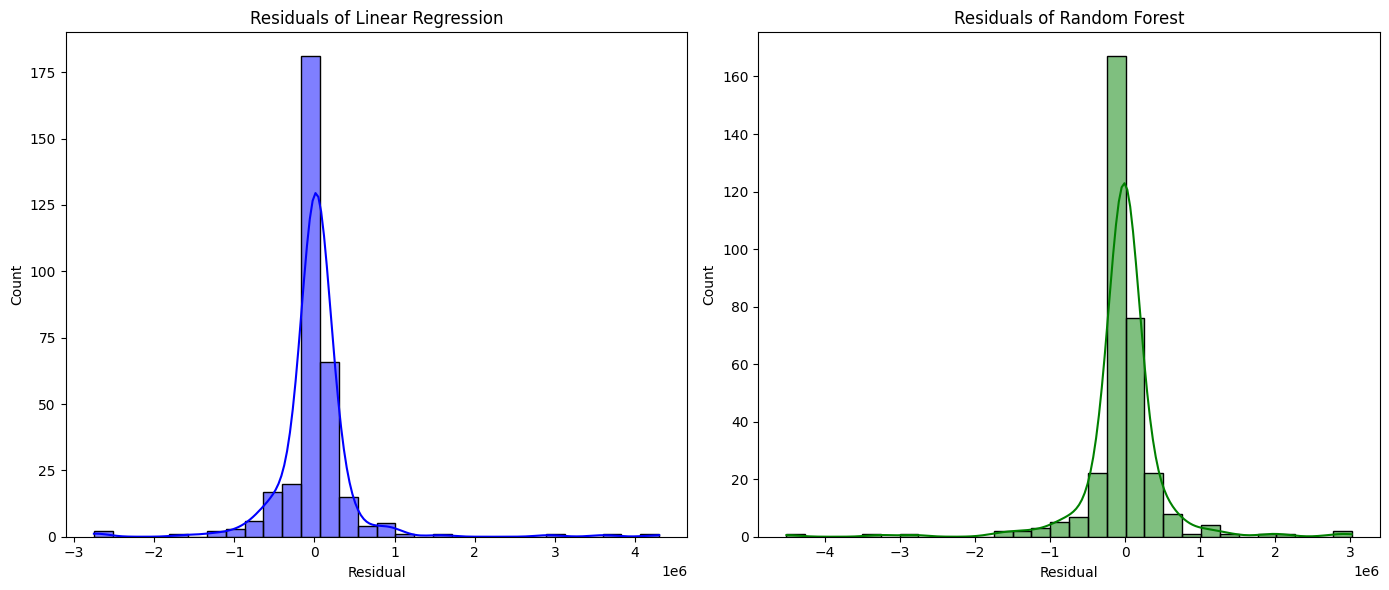

In [33]:
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, bins=30, kde=True, color='blue')
plt.title("Residuals of Linear Regression")
plt.xlabel("Residual")

plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, bins=30, kde=True, color='green')
plt.title("Residuals of Random Forest")
plt.xlabel("Residual")

plt.tight_layout()
plt.show()